Highest sentiment tweet: #STOSAR  LIVE: Celebrating International day of Plant Health 12 May in Limpopo https://t.co/IkWskTEy05
@FAO is the lead implementing agency for 2 components of the Support Towards the Operationalization of the SADC Regional Agricultural Policy Project #STOSAR supported by EU https://t.co/jDRufWhr3S , Compound: 0.8271

Lowest sentiment tweet: Customize Surface Hub with Progressive Web Apps https://t.co/rgJU22Mr28 #techcommunity , Compound: 0.0


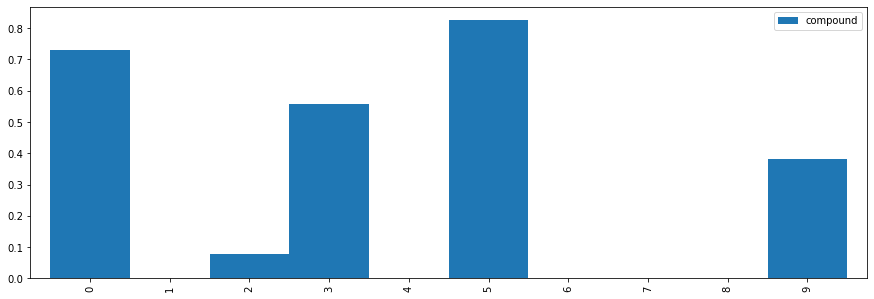

In [29]:
import pandas as pd
import tweepy
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setup analyzer and twitter api objects
analyzer = SentimentIntensityAnalyzer()
client = tweepy.Client(bearer_token=config.BEARER_TOKEN)

# Retrieve tweets that are english and have a certain phrase in them
tweets = client.search_recent_tweets(query="Microsoft lang:en -is:retweet")

# Analyse the tweets with vaderSentiment and save the result of each tweet
tweetsWithSent = []
for t in tweets.data:
    text = t.text
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text': text, 'compound': ps['compound']})

# Plot the result of analysis
# - A high compound can be regarderd as a highly positive tweet (1 being the highest posibile score)
# - A low compound can be regarded as a highly negative tweet (-1 being the lowest possibile score)
# - A compound score of 0 can be regarded as a highly neatral tweet
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)

highestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if highestSentimentTweet['compound'] <= t['compound']:
        highestSentimentTweet = t

lowestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if lowestSentimentTweet['compound'] >= t['compound']:
        lowestSentimentTweet = t

print("Highest sentiment tweet: % s , Compound: % s" % (highestSentimentTweet['text'], highestSentimentTweet['compound']))
print()
print("Lowest sentiment tweet: % s , Compound: % s" % (lowestSentimentTweet['text'], lowestSentimentTweet['compound']))


In [ ]:
import pandas as pd
import tweepy
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setup analyzer and twitter api objects
analyzer = SentimentIntensityAnalyzer()
client = tweepy.Client(bearer_token=config.BEARER_TOKEN)

# Retrieve tweets that are english and have a certain phrase in them
tweets = client.search_recent_tweets(query="Microsoft lang:en -is:retweet")

# Analyse the tweets with vaderSentiment and save the result of each tweet
tweetsWithSent = []
for t in tweets.data:
    text = t.text
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text': text, 'compound': ps['compound']})

# Plot the result of analysis
# - A high compound can be regarderd as a highly positive tweet (1 being the highest posibile score)
# - A low compound can be regarded as a highly negative tweet (-1 being the lowest possibile score)
# - A compound score of 0 can be regarded as a highly neatral tweet
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)

highestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if highestSentimentTweet['compound'] <= t['compound']:
        highestSentimentTweet = t

lowestSentimentTweet = tweetsWithSent[0]
for t in tweetsWithSent:
    if lowestSentimentTweet['compound'] >= t['compound']:
        lowestSentimentTweet = t

print("Highest sentiment tweet: % s , Compound: % s" % (highestSentimentTweet['text'], highestSentimentTweet['compound']))
print()
print("Lowest sentiment tweet: % s , Compound: % s" % (lowestSentimentTweet['text'], lowestSentimentTweet['compound']))
